# LIBRARIES

In [2]:
import numpy as np
import pandas as pd
import pyodbc
from datetime import date
from datetime import datetime
import re
import matplotlib.pyplot as plt
import seaborn as sns

In this document I apply the CRIPS-DM methodology to conduct the analysis and different products I want to obtained. 

# PROBLEM OR BUSINESS COMPREHENSION PHASE

## General Objective

Althought, my main objective with this or other projects is to build my own portafolio, in this specific case I want to use this database to accomplish the following analysis:

- Use the title or any other field of the table for applying web scrapping techniques to connect to Wikipedia and obtain if the Movie won any important award (such as the Oscar, Golden Globes).

- Perform some sort of unsupervised/supervised method to determine the caracteristics of the award winning movie.

## Situation Assessment

Currently, the main risk is to obtain the information of the awards, which is not currently available in this table. The idea is, with webscrapping techniques, search for this information in Wikipedia.

## DataMining Objectives

- Interact with two different sources of information. As explained before, one the sources is a database obtained from a website with a column name compose of the title of the movies. The idea is to grab each of the title movies and search their award information in Wikipedia and other info of this movies.

- With the information gathered from Wikipedia and the aforementioned RottenTomatoes database, perform different kind of analysis that the new data will allow.

- Build an Shiny app using Python.

- Use different technologies/tools to carry on the analysis. The idea was not solely downloading the CSV database and then uploading in my code in exactly the same format. The idea was to put this CSV file in a database engine (such as SQL Server) and from the code, include some SQL to interact with this table.

# DATA COMPREHENSION PHASE

## Database Connection

In [3]:
SERVER = 'DESKTOP-G1RQ1QS\SQLEXPRESS'
DATABASE = 'rotten_tomatoes_movies'

connectionString = f'DRIVER={{SQL SERVER}};SERVER={SERVER};DATABASE={DATABASE}'
conn = pyodbc.connect(connectionString)

In [4]:
sql_inicial = """
SELECT *
FROM movie_rating;
"""

In [5]:
df = pd.read_sql(sql_inicial, conn)

C:\Users\Dell\AppData\Local\Temp\ipykernel_9388\2426569905.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql_inicial, conn)


## Data description

This table has 16.638 rows and 17 columns.

In [6]:
df.shape

(16638, 17)

First 5 rows of the data

In [7]:
df.head()

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minuts,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010-06-29,83.0,20th Century Fox,Rotten,49.0,144,53.0,254287.0
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2010-10-19,90.0,Sony Pictures Classics,Certified Fresh,86.0,140,64.0,11567.0
2,Vengeance (Fuk sau),"A former assassin, now a French chef, comes to...",None,R,"Action & Adventure, Art House & International,...",Johnnie To,Wai ka Fai,"Johnny Hallyday, Sylvie Testud, Anthony Wong, ...",2010-08-04,2010-11-16,108.0,IFC Films,Fresh,91.0,22,60.0,1880.0
3,10,Blake Edwards' 10 stars Dudley Moore as George...,None,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,1997-08-27,118.0,Waner Bros.,Fresh,68.0,22,53.0,14670.0
4,"10,000 B.C.",A young outcast from a primitive tribe is forc...,With attention strictly paid to style instead ...,PG-13,"Action & Adventure, Classics, Drama",Roland Emmerich,"Roland Emmerich, Harald Kloser","Steven Strait, Camilla Belle, Cliff Curtis, Jo...",2008-03-07,2008-06-24,109.0,Warner Bros. Pictures,Rotten,8.0,148,37.0,411087.0


The columns that compose the data are the following:

- **movie_title:** title of the movie, type object or string with 0 null values.
- **movie_info:** breef summary of the movie plotline, type object with 
- **critics_consensus:** breef review of the critics opinion about the movie.
- **rating:** age category for what the movie is intended. 0 null values.
- **genre:** genre of the movie. If it's a western, adverture and so on.
- **directors:** who directed a film. 
- **writers:** whom write the story.
- **cast:** who acted on the film.
- **in_theaters_date:** opening date at the cinemas. Stored as object.
- **on_streaming_date:** date the movie arrived to any sort of streaming services. **Research more, some dates could be when the VHS/DVD was released.** Stored as object.
- **runtime_in_minuts**: how long does the movie lasts.
- **studio_name:** studio that made the movie.
- **tomatometer_status:** it's a categorization of the general consensus of the film, sum up in three categories (based upon the site https://www.rottentomatoes.com/about): 
                1. Rotten: less than 60% are positive.
                2. Fresh:  at least 60% of the reviews are positive.
                3. Certified Fresh: is a special designation awarded to the best-reviewed movies. One of the requeriments is that the tomatometer score is at least 75%.
- **tomatometer_rating:** *average score given to the film by film critics*
- **tomatometer_count:** how many critics reviewed the film.
- **audience_rating:** *average score given to the film by the audience*
- **audience_count:** how many people (non-critics) reviewed the film.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16638 entries, 0 to 16637
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_title         16638 non-null  object 
 1   movie_info          16614 non-null  object 
 2   critics_consensus   8309 non-null   object 
 3   rating              16638 non-null  object 
 4   genre               16621 non-null  object 
 5   directors           16524 non-null  object 
 6   writers             15289 non-null  object 
 7   cast                16354 non-null  object 
 8   in_theaters_date    15823 non-null  object 
 9   on_streaming_date   16636 non-null  object 
 10  runtime_in_minuts   16483 non-null  float64
 11  studio_name         16222 non-null  object 
 12  tomatometer_status  16638 non-null  object 
 13  tomatometer_rating  16638 non-null  float64
 14  tomatometer_count   16638 non-null  int64  
 15  audience_rating     16386 non-null  float64
 16  audi

### Categorical variables

In [9]:
tomatometer_status_count = pd.crosstab(index=df["tomatometer_status"], columns="n", colnames=[""])
tomatometer_status_count

,n
tomatometer_status,
Certified Fresh,2957
Fresh,6448
Rotten,7233


In [19]:
rating_count = pd.crosstab(index=df["rating"], columns="n", colnames=[""])
rating_count

,n
rating,
G,652
NC17,37
NR,4862
PG,2062
PG-13,2885
PG-13),3
R,6136
R),1


Some ratings categories have errors: such as PG-13) and R), that include a parenthesis at the end. 

In [20]:
studio_name_count = pd.crosstab(index=df["studio_name"], columns="n", colnames=[""])
studio_name_count

,n
studio_name,
10 West Studios,1
108 Pics,1
1091,1
120 Degree Films,1
1428 Films,1
...,...
eRealBiz,2
iHQ,1
levelFILM,2


### Numerical variables

Some aspects to review:

- runtime_in_minuts: has 1 minute to 2000 minutes. Check if they are about a short film or a tv-series, or a trilogy.

- audience_count: check why it was presented with commas and it looks different from the other numerical values. 

In [10]:
df.describe()

,runtime_in_minuts,tomatometer_rating,tomatometer_count,audience_rating,audience_count
count,16483.000000,16638.000000,16638.000000,16386.000000,1.638600e+04
mean,102.391494,60.466522,56.607104,60.470829,1.524797e+05
std,25.028011,28.587230,66.383800,20.462368,1.817736e+06
min,1.000000,0.000000,5.000000,0.000000,5.000000e+00
25%,90.000000,38.000000,12.000000,45.000000,8.642500e+02
50%,99.000000,66.000000,28.000000,62.000000,4.876500e+03
75%,111.000000,86.000000,76.000000,77.000000,2.875200e+04
max,2000.000000,100.000000,497.000000,100.000000,3.579764e+07


## EDA

In [11]:
df.dropna().describe()

,runtime_in_minuts,tomatometer_rating,tomatometer_count,audience_rating,audience_count
count,7610.000000,7610.000000,7610.000000,7610.000000,7.610000e+03
mean,106.319974,61.312352,101.143101,62.987385,3.197788e+05
std,19.560031,27.638312,72.922055,19.546161,2.657350e+06
min,1.000000,0.000000,5.000000,6.000000,5.000000e+00
25%,94.000000,39.000000,44.000000,48.000000,6.042000e+03
50%,103.000000,67.000000,80.000000,65.000000,2.523550e+04
75%,116.000000,86.000000,141.000000,79.000000,9.480075e+04
max,333.000000,100.000000,497.000000,100.000000,3.579764e+07


In [12]:
df_audience_count = df.loc[:,"audience_count"]

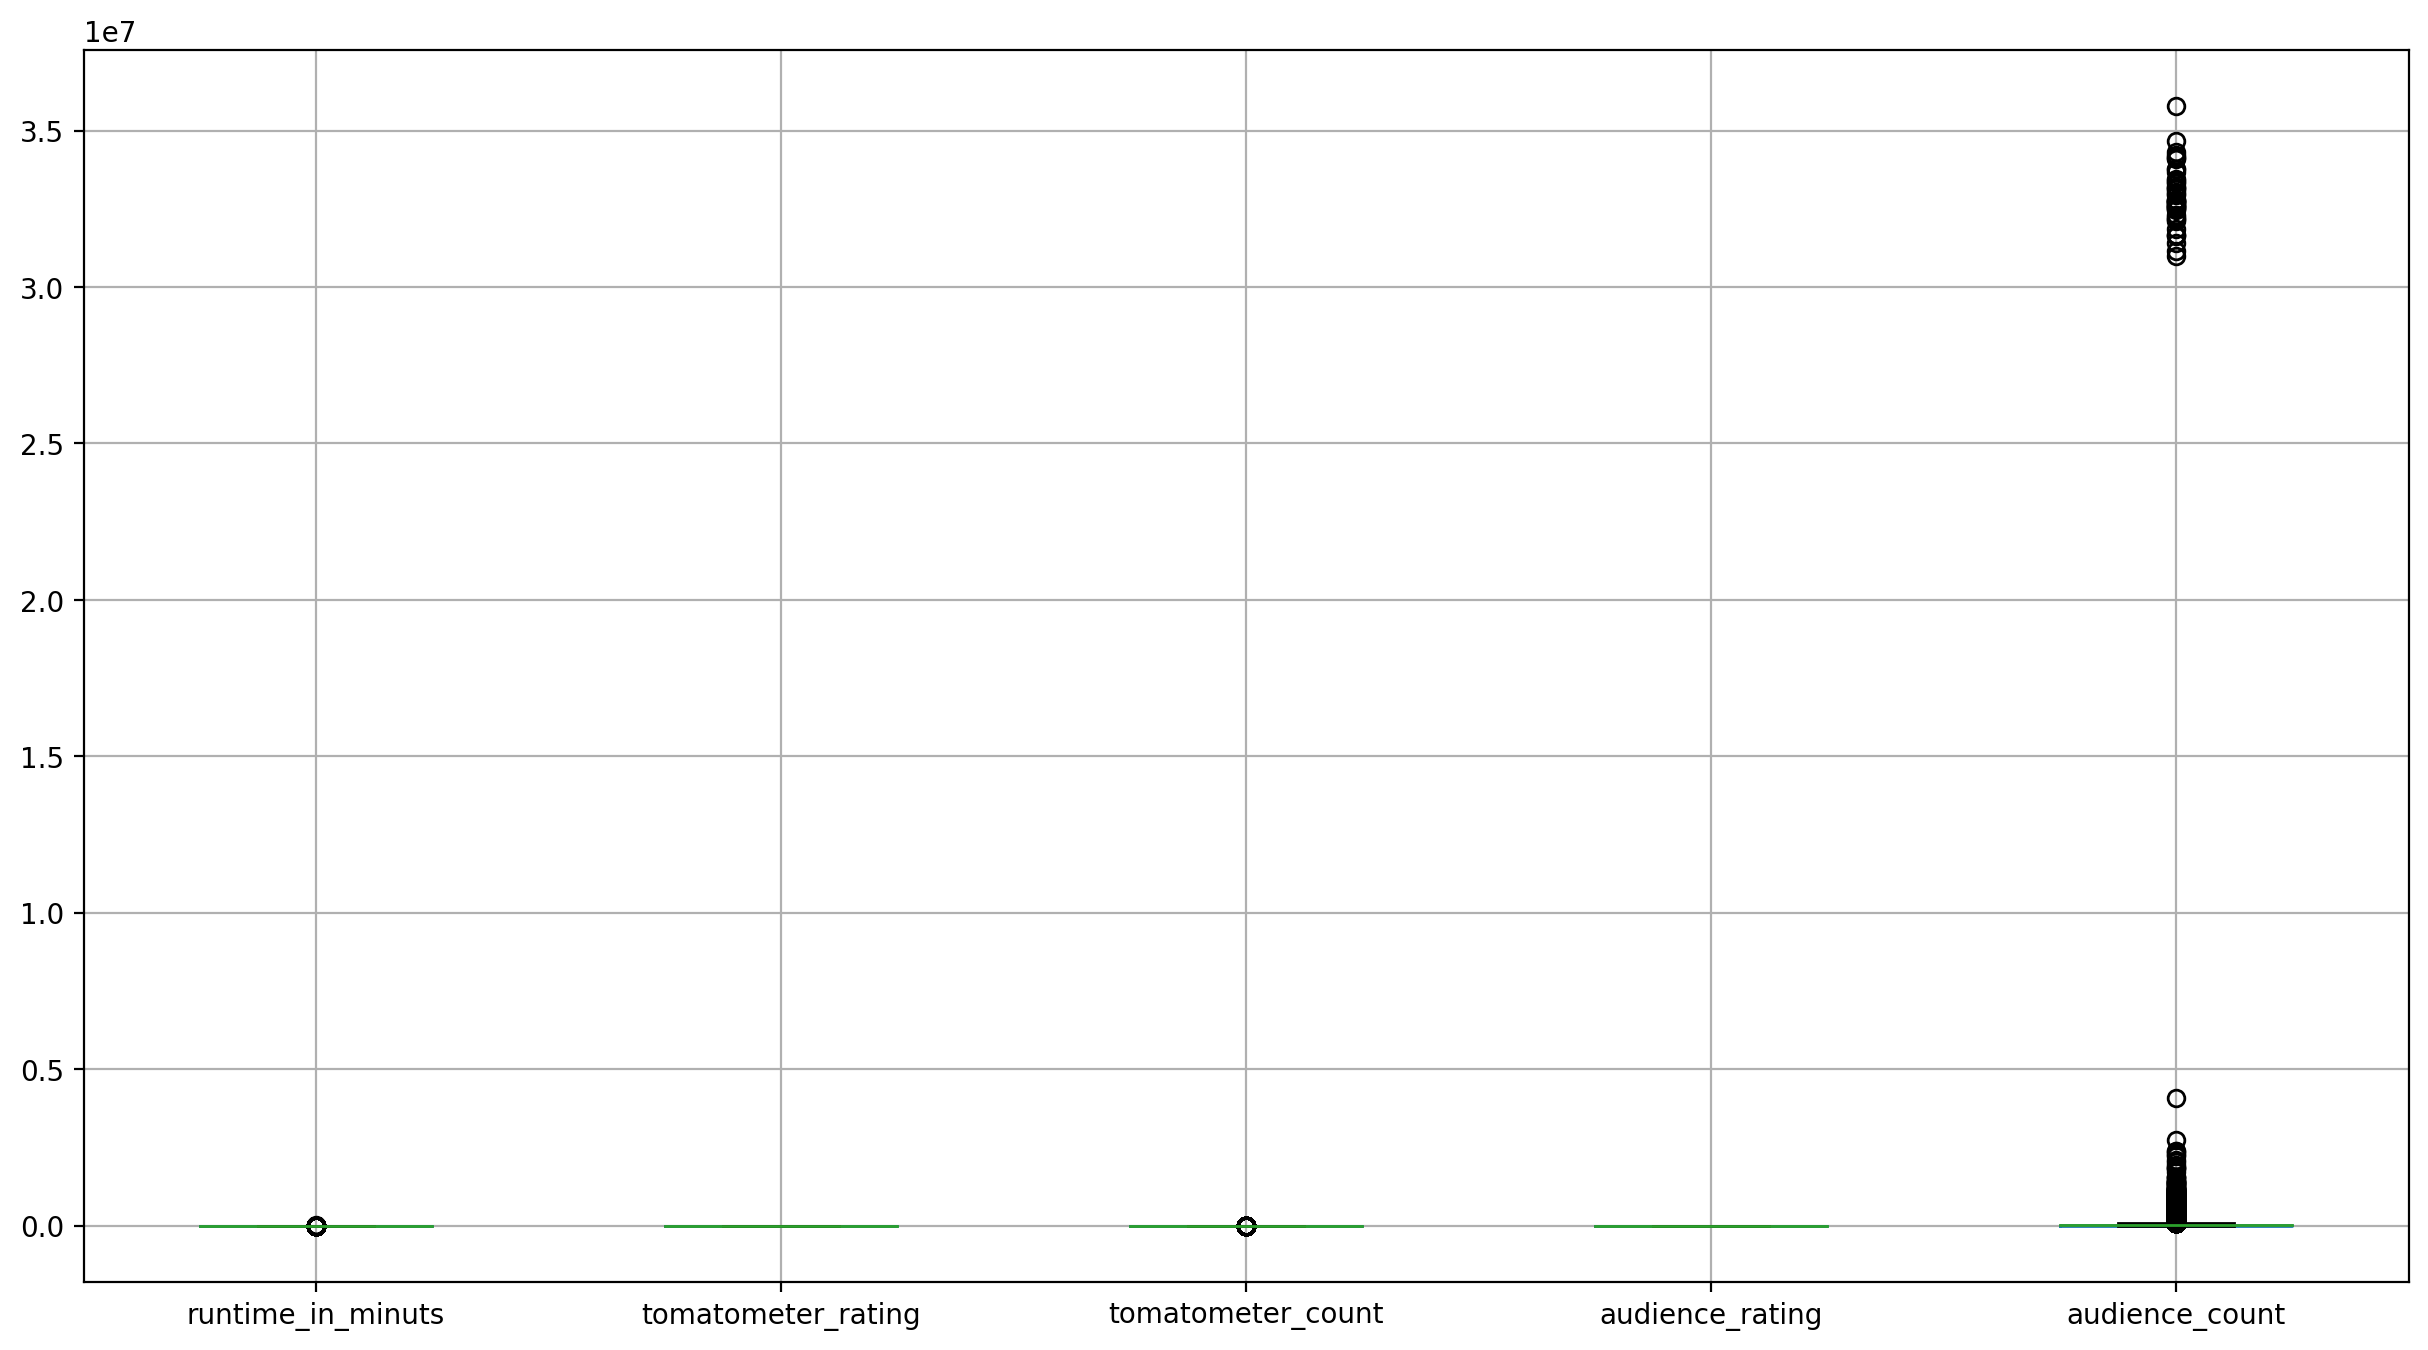

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (15,8), dpi = 200)
boxplots = df.boxplot(return_type='axes',ax=ax)
plt.show()

In [14]:
df_no_audience_count = pd.DataFrame(df.loc[:,df.columns != "audience_count"])

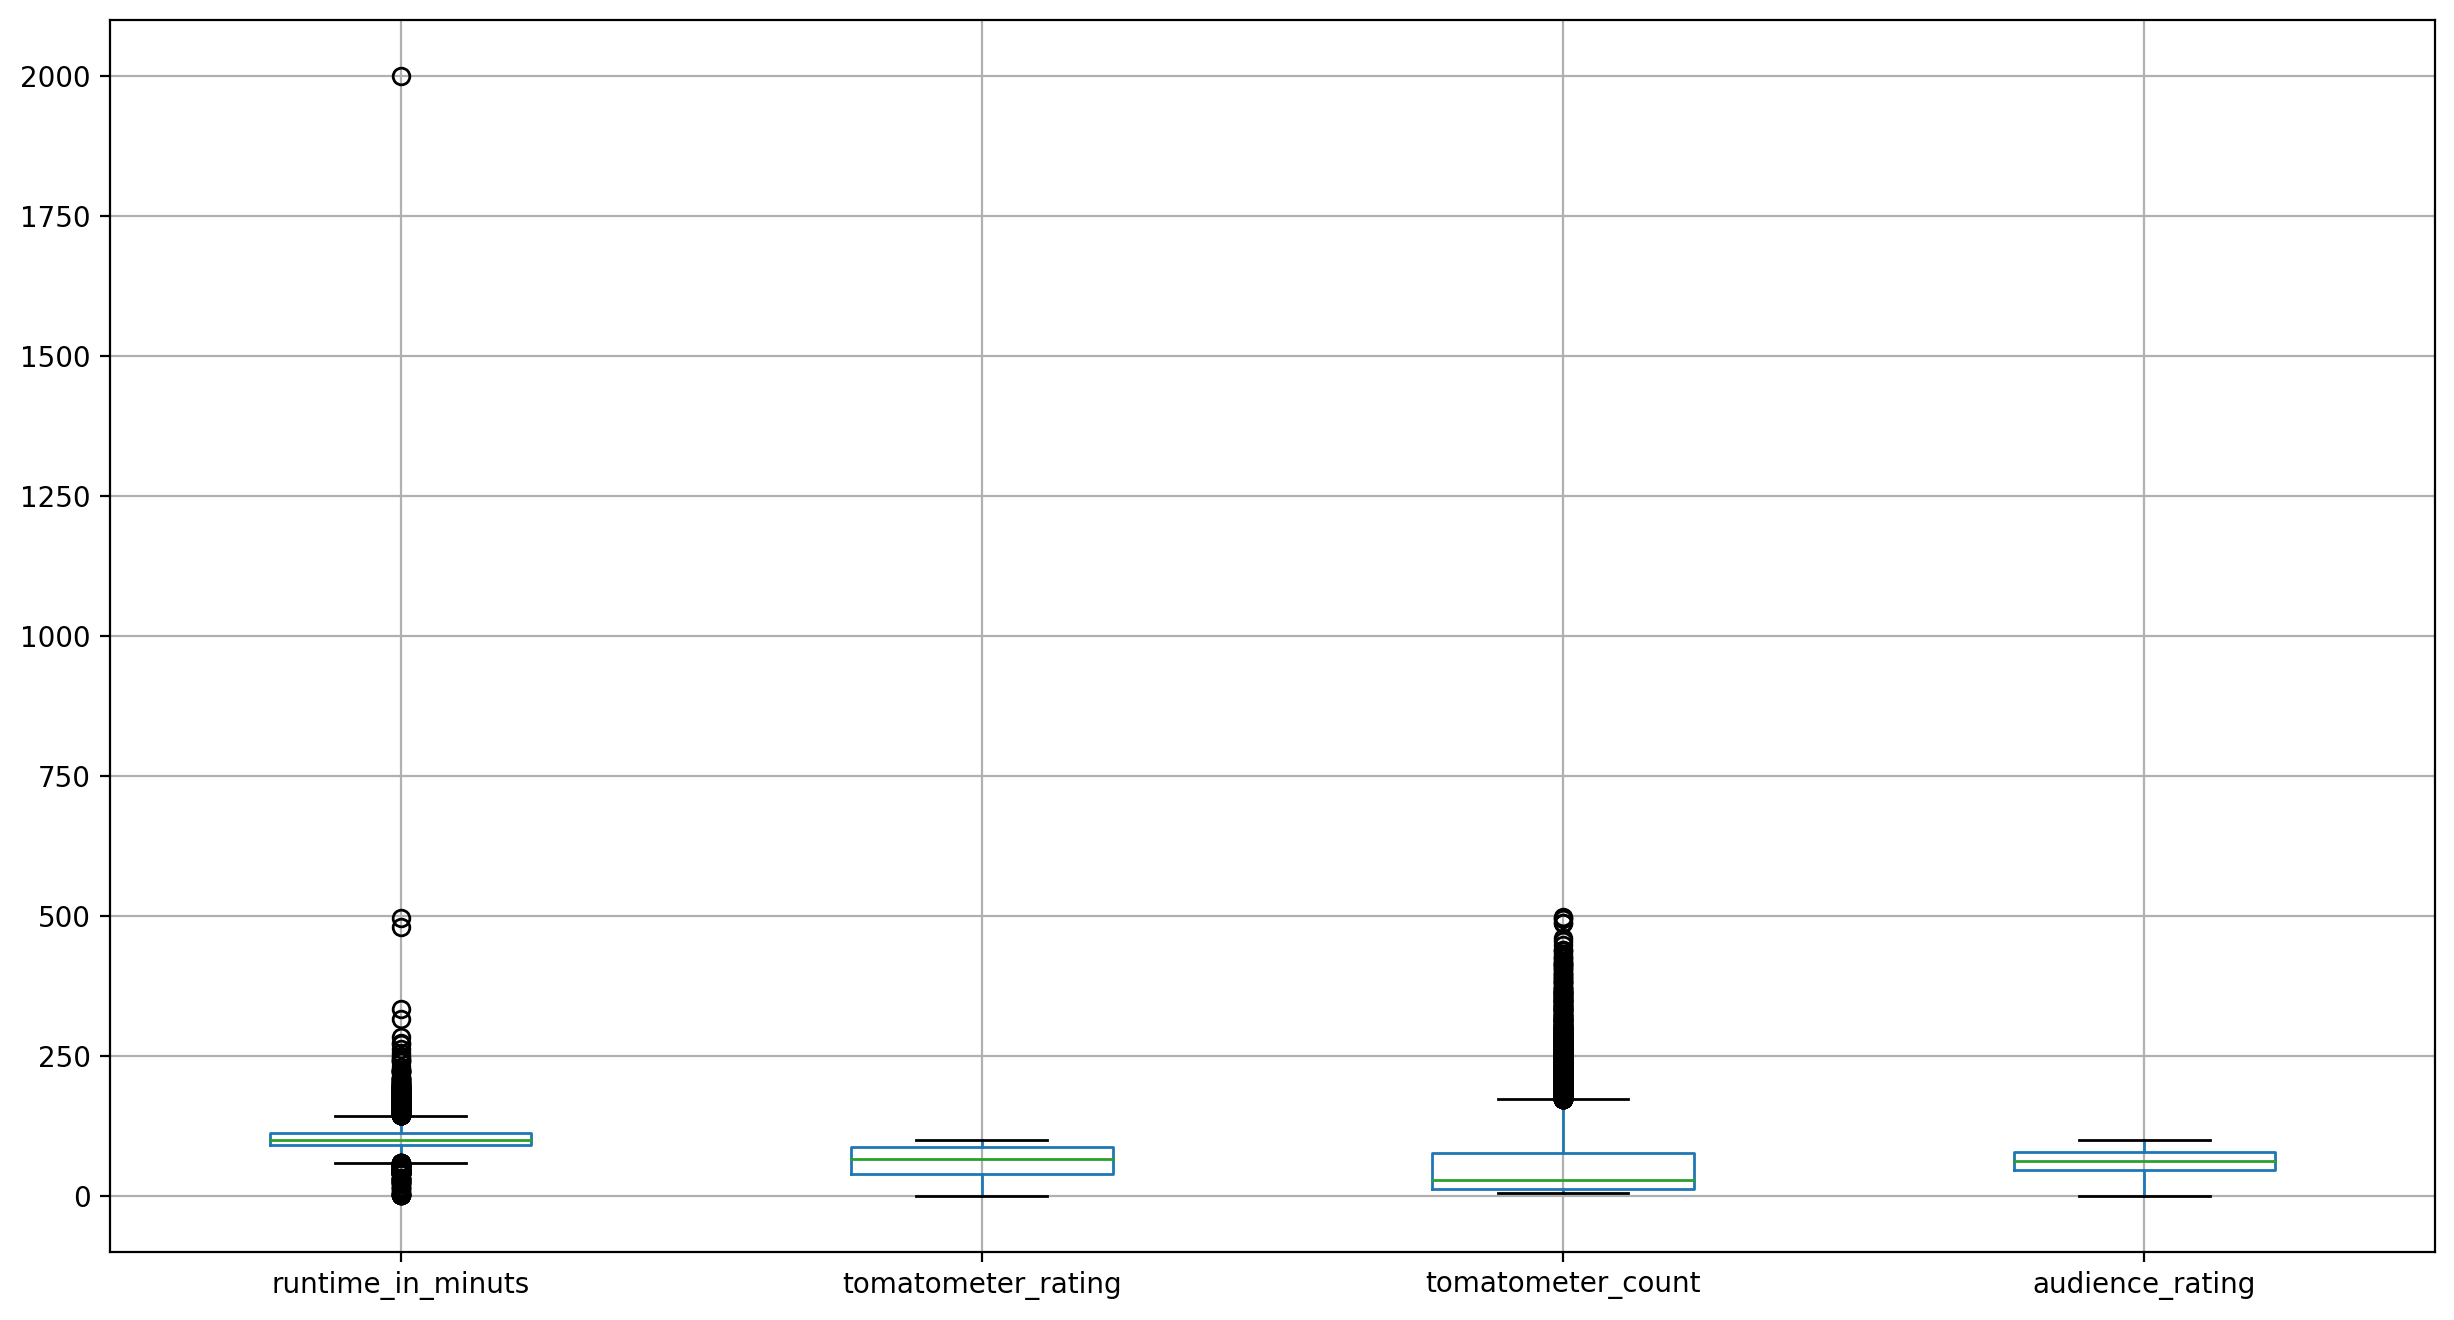

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (15,8), dpi = 200)
boxplots = df_no_audience_count.boxplot(return_type='axes',ax=ax)
plt.show()

In [24]:
df_max_runtime = df[df.runtime_in_minuts == 2000]
df_max_runtime

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minuts,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count
13589,Terror Tract,John Ritter stars in this three-part horror an...,None,R,"Comedy, Horror, Mystery & Suspense","Lance W. Dreesen, Clint Hutchinson, Clint Hutc...",Clint Hutchison,"John Ritter, Bryan Cranston, Rachel York, Carm...",2000-10-18,2001-01-30,2000.0,USA Home Entertainment,Fresh,60.0,5,35.0,586.0


In [27]:
df_others = df_no_audience_count[df_no_audience_count.runtime_in_minuts != 2000]

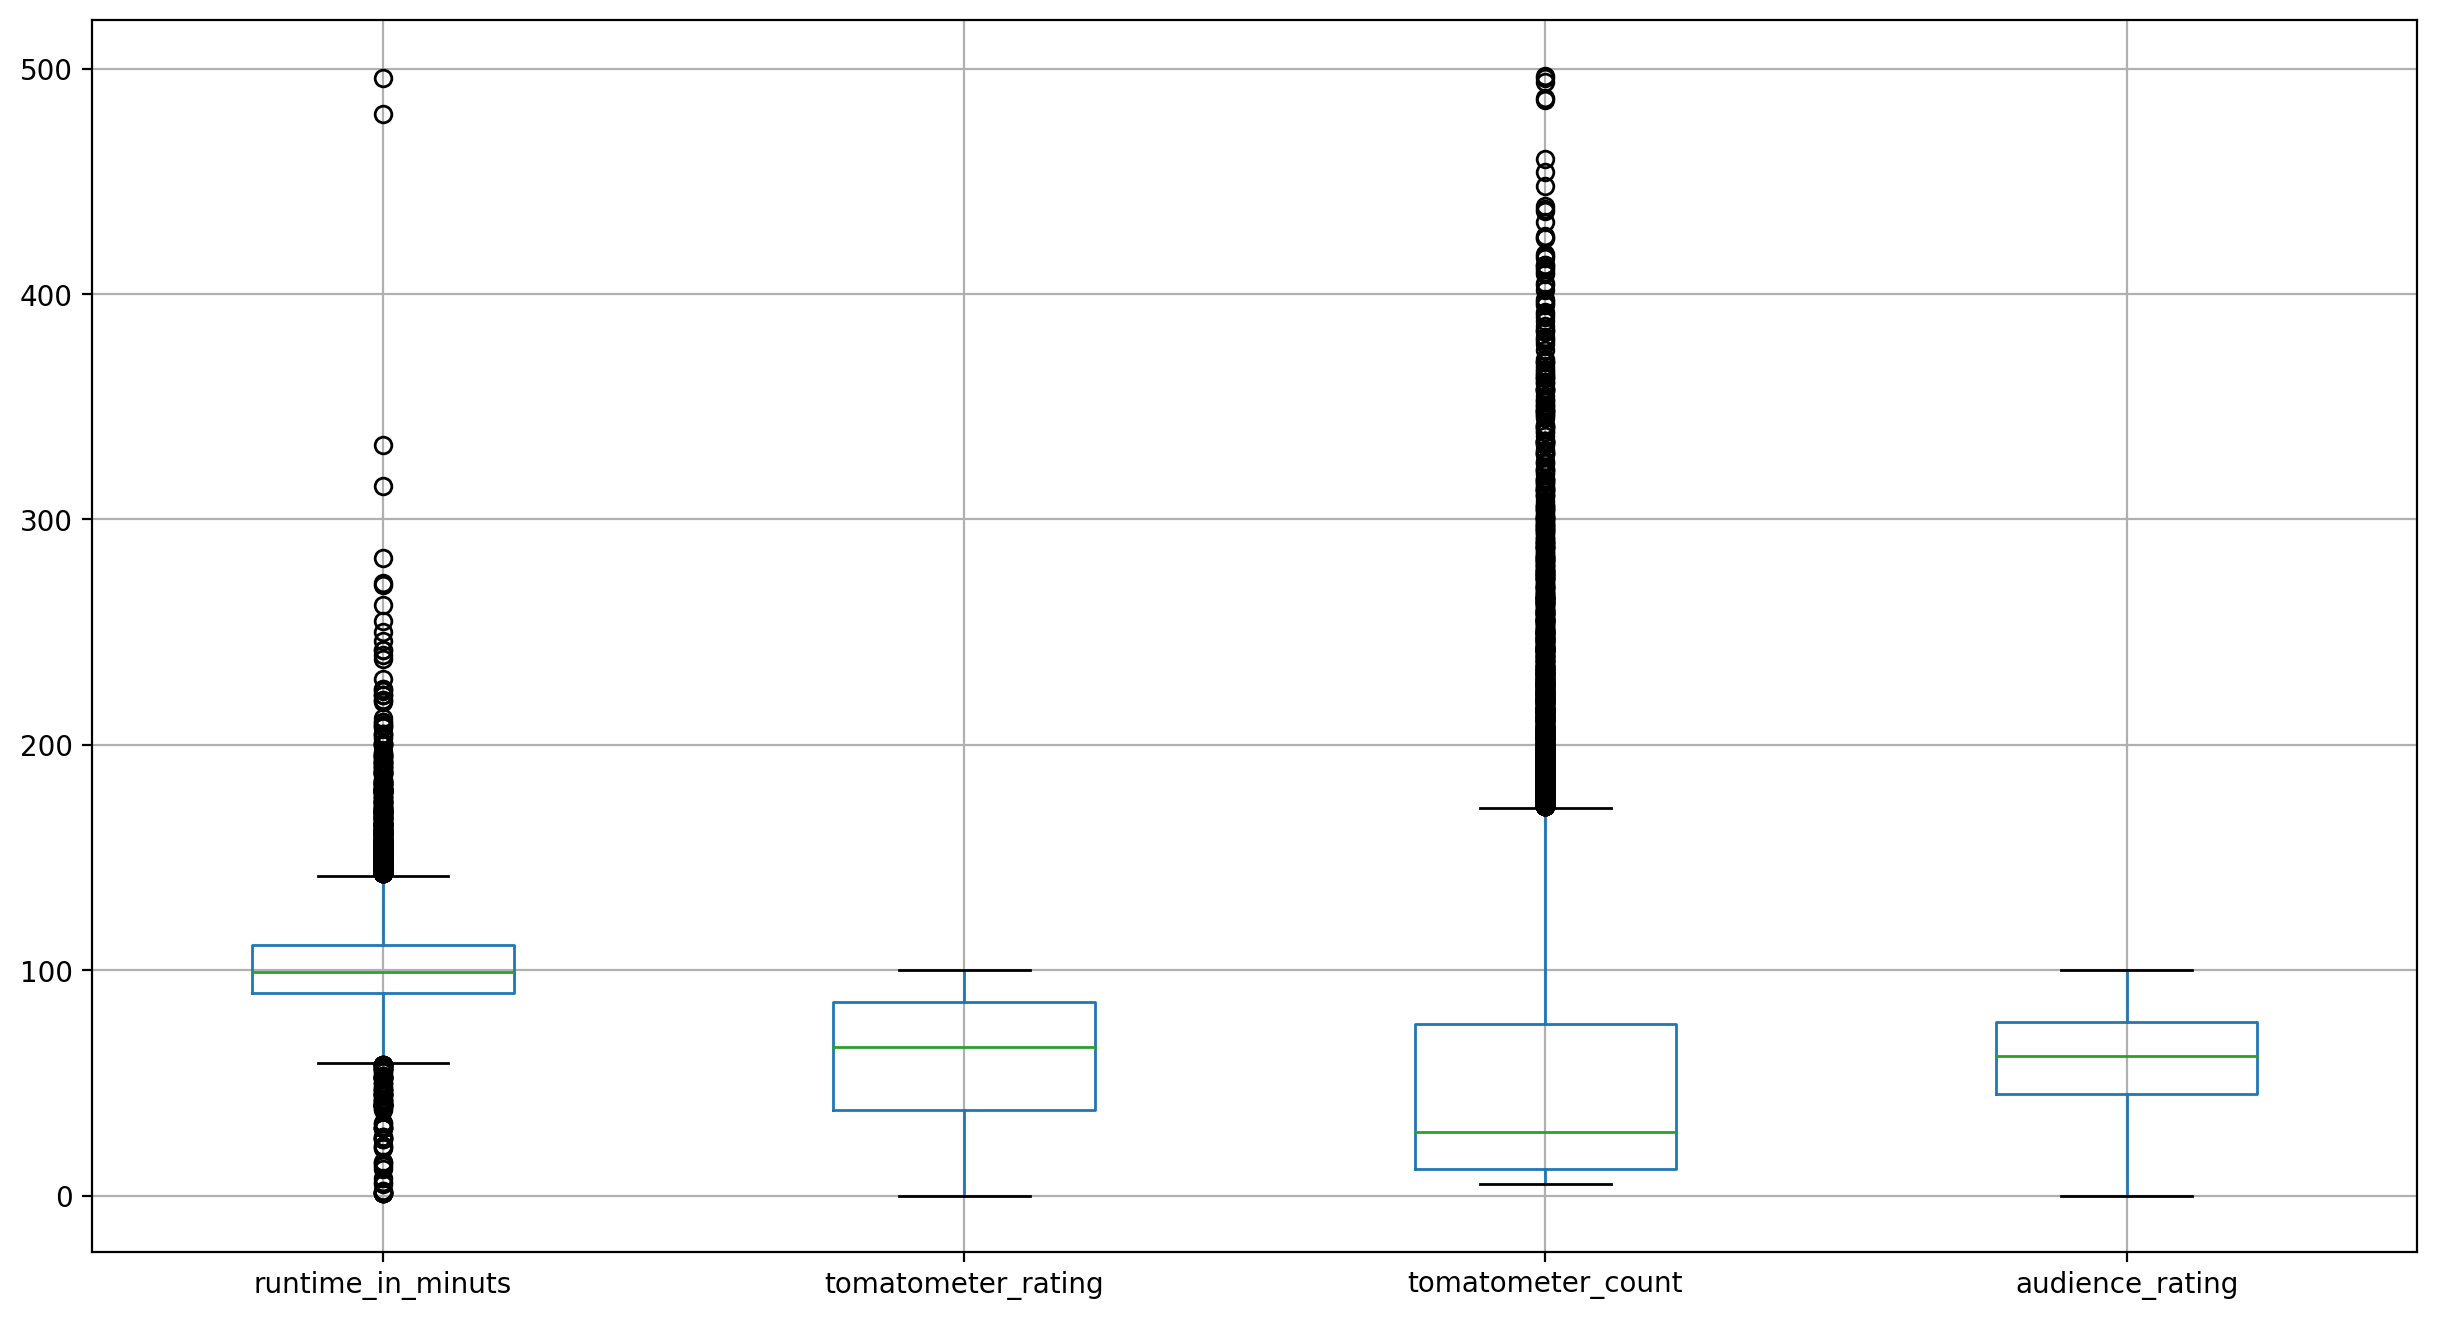

In [28]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (15,8), dpi = 200)
boxplots = df_others.boxplot(return_type='axes',ax=ax)
plt.show()

### Correlation

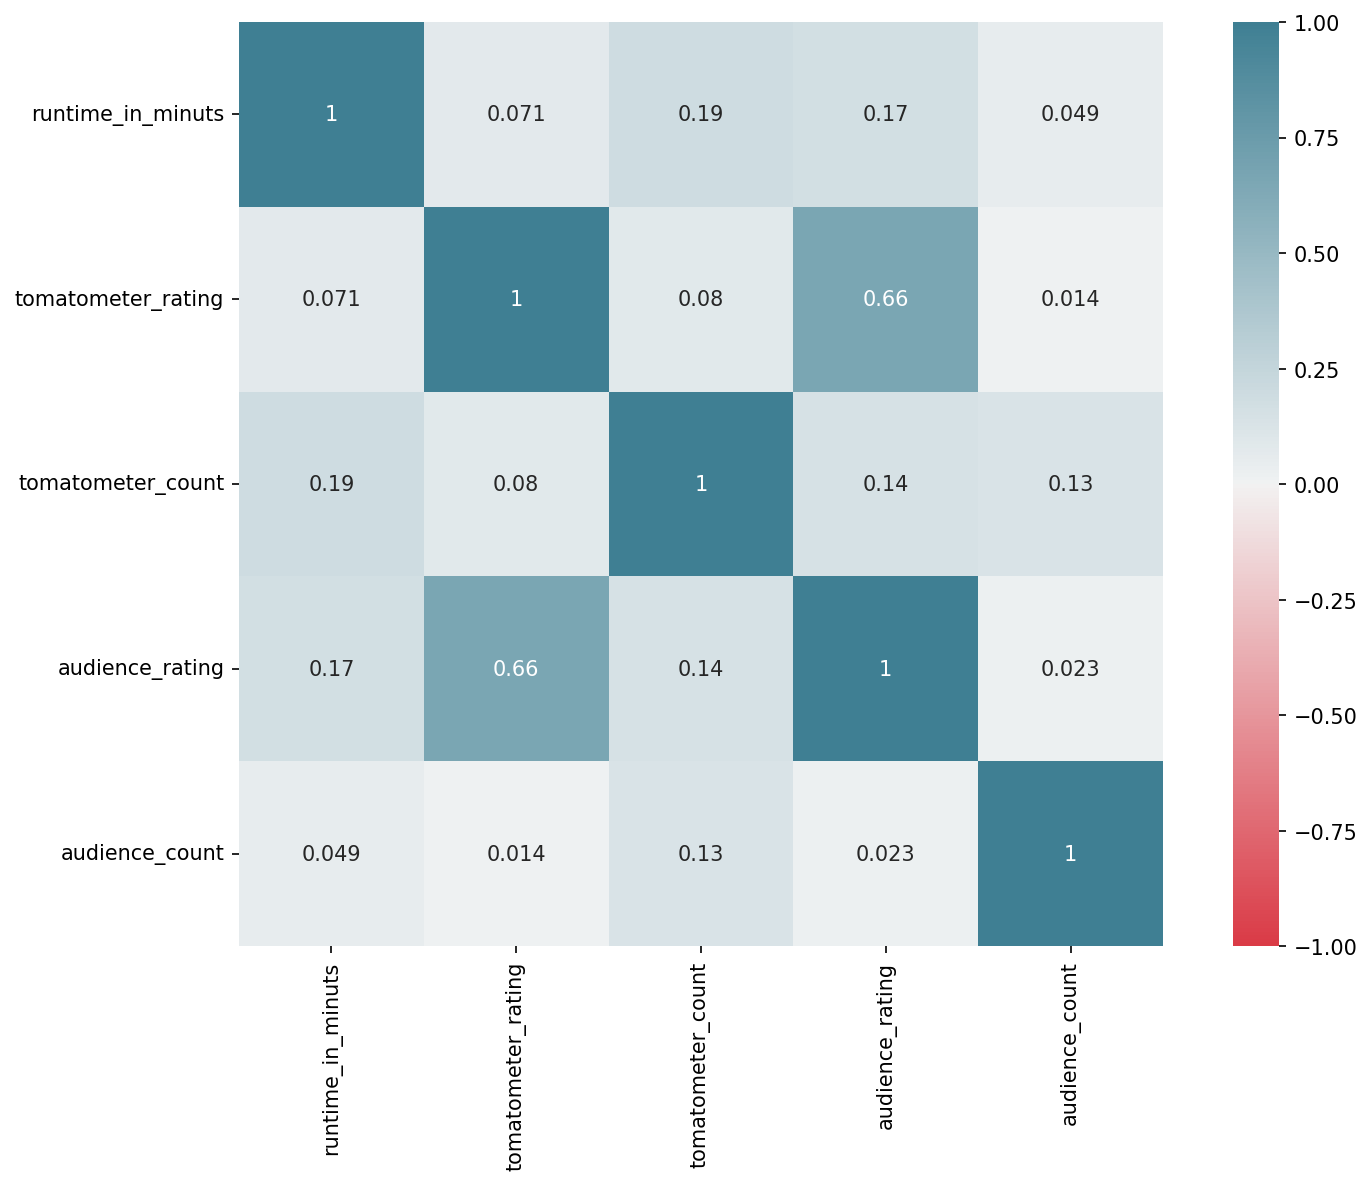

In [17]:
corr = df.corr(numeric_only=True)

fig, ax = plt.subplots(figsize=(12, 8), dpi = 150)
paleta = sns.diverging_palette(220, 10,as_cmap=True).reversed()
sns.heatmap(corr, vmin= -1, vmax=1, cmap= paleta,
            square=True, annot=True, ax=ax)
plt.show()